In [23]:
using Pkg; Pkg.activate("."); #Pkg.add("Polynomials")
using Statistics
using PyPlot
using Glob
using DelimitedFiles
using Revise
import MUST
using LaTeXStrings 
using Interpolations
using KernelDensity
using Polynomials

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


In [24]:
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" 
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" EOS 
MUST.@get_help visual
pl = pyimport("matplotlib.pylab");

In [25]:
get_teff(folder) = begin
    path = joinpath(folder, "teff.dat")
    if !ispath(path) @warn "$(path) does not exist."
        return nothing
    end
    data = readdlm(path)
end 

get_teff (generic function with 1 method)

In [26]:
solar_model = readdlm("solar_model.txt");

In [27]:
folders = [ MUST.@in_dispatch("data/TSO_8_5m7_eemin"),
            MUST.@in_dispatch("data/density_test_5m7_cooler_eemin")]

2-element Vector{String}:
 "/cobra/ptmp/peitner/model_grid/dispatch2_clean/dispatch2/experiments/stellar_atmospheres/data/TSO_8_5m7_eemin"
 "/cobra/ptmp/peitner/model_grid/dispatch2_clean/dispatch2/experiments/stellar_atmospheres/data/density_test_5m7_cooler_eemin"

In [28]:
teff_models = get_teff.(folders);
teff_models = teff_models[.!isnothing.(teff_models)];

In [29]:
models = MUST.Boxes.(folders);

In [30]:
stagger_τ = MUST.Box("box_stagger_sun");

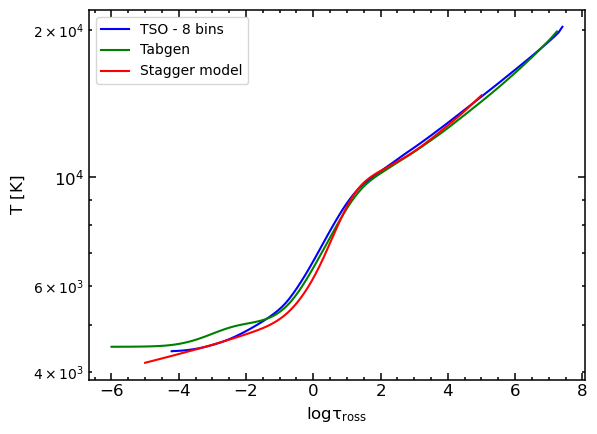

PyObject <matplotlib.legend.Legend object at 0x2b3ff4afbfa0>

In [31]:
#close("all")

f, ax  = plt.subplots(1,1, sharex=true)
basic_plot!.(ax)
plt.subplots_adjust(hspace=0.0)

t = log.(10, MUST.axis(models[1][2][end], :τ_ross, 3))
v  = MUST.plane_statistic(mean, models[1][2][end], :T) 
ax.plot(t, v, color="b", label="TSO - 8 bins")

t = log.(10, MUST.axis(models[2][2][end], :τ_ross, 3))
v  = MUST.plane_statistic(mean, models[2][2][end], :T) 
ax.plot(t, v, color="g", label="Tabgen")

t = log.(10, MUST.axis(stagger_τ, :τ_ross, 3))
v  = MUST.plane_statistic(mean, stagger_τ, :T) 
ax.plot(t, v, color="r", label="Stagger model")

ax.set_ylabel(@L_str("\\rm T\\ [K]"), fontsize="large");
ax.set_xlabel(@L_str("\\rm \\log\\tau_{ross}"), fontsize="large");

ax.set_yscale("log")
ax.legend()
#gcf()